# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования — установить параметры, позволяющие построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности:**
 * общая площадь;
 * жилая площадь;
 * площадь кухни;
 * цена объекта;
 * количество комнат;
 * высота потолков;
 * этаж квартиры;
 * тип этажа квартиры («первый», «последний», «другой»);
 * общее количество этажей в доме;
 * расстояние до центра города в метрах;
 * расстояние до ближайшего аэропорта;
 * расстояние до ближайшего парка;
 * день и месяц публикации объявления

**Так же необходимо ответить на четыре вопроса:**
- Как быстро продаются квартиры, сколько дней размещается объявление
- Какие факторы влияют на общую стоимость объекта
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- Какая средняя цена одного квардратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Какая средняя цена каждого километра до центра в Санкт-Петербурге

Данные о недвижимости  содержатся в файле `real_estate_data.csv`. Перед установлением параметров и ответов на вопросы необходимо ознакомиться с данными.

При налачии ошибок оценить их влияние на исследование. На этапе предобработки необходимо исправить самые критичные ошибки.

Исследование будет проходить в четыре этапа:
 1. Обзор данных
 2. Преобработка данных.
 3. Проверка гипотез
 4. Общий вывод

## Обзор данных

Подключаем библиотеку `pandas` и импортируем базу данных `real_estate_data.csv` с разделение строки `sep='\t'`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #для яндекса
#data = pd.read_csv('real_estate_data.csv', sep='\t') # локально

Выводим общую информацию по таблице

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца с типами данных — `int`, `float`, `object`, `bool`

 * `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
 * `balcony` — число балконов
 * `ceiling_height` — высота потолков (м)
 * `cityCenters_nearest` — расстояние до центра города (м)
 * `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
 * `first_day_exposition` — дата публикации
 * `floor` — этаж
 * `floors_total` — всего этажей в доме
 * `is_apartment` — апартаменты (булев тип)
 * `kitchen_area` — площадь кухни в квадратных метрах (м²)
 * `last_price` — цена на момент снятия с публикации
 * `living_area` — жилая площадь в квадратных метрах (м²)
 * `locality_name` — название населённого пункта
 * `open_plan` — свободная планировка (булев тип)
 * `parks_around3000` — число парков в радиусе 3 км
 * `parks_nearest` — расстояние до ближайшего парка (м)
 * `ponds_around3000` — число водоёмов в радиусе 3 км
 * `ponds_nearest` — расстояние до ближайшего водоёма (м)
 * `rooms` — число комнат
 * `studio` — квартира-студия (булев тип)
 * `total_area` — общая площадь квартиры в квадратных метрах (м²)
 * `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различаются, следовательно **есть пропущенные значения**

Выведем первые 20 строк таблицы

In [ ]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


По представленным 20 строкам датафрейма можно сказать, что:
 * Имеется большое количество пропуском, почти во всех столбцах, к примеру `ceiling_height`, `is_apartment`, `balcony` и т.д., которые необходимо будет заполнить или пропустить
 * Не соответствие типа данных и заполненой информации в столбцах, к примеру `first_day_exposition` необходимо перевести в формат datetime

Построим гистограммы по все столбцам датафрейма, для общего представления рынка недвижимости в разрезе каждого параметра

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

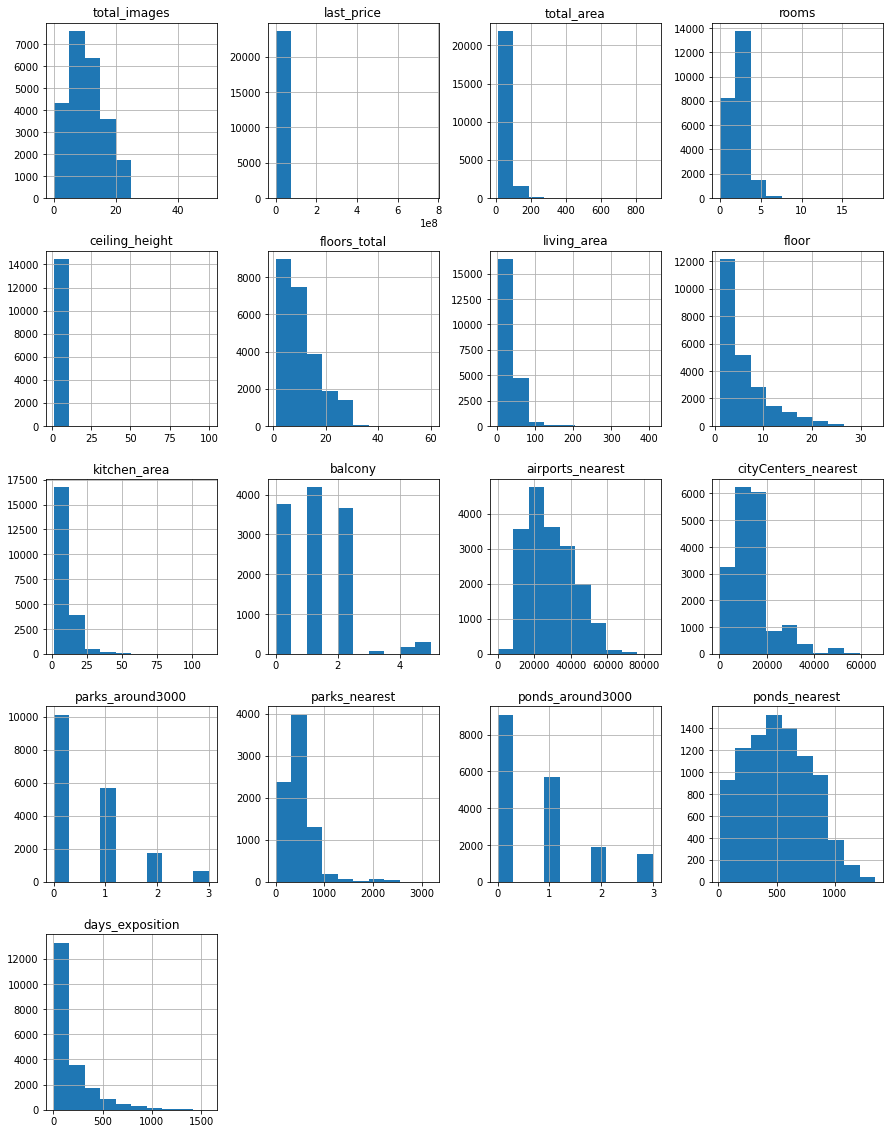

In [ ]:
data.hist(figsize=(15, 20))

### **Вывод:**

При ознакомленлении с датафреймом `real_estate_data.csv`, было установленно что он содержит информацию о объявлениях квартир, размещённых на Яндекс.Недвижимость.
Имеется большое количество пропусков в ряде столбцов и не соответствие типов информации.
На стадии предобработки необходимо:
 1. Заполнить отсутсвующую информацию, либо оставить пропуски
 2. Выявить явные и неявные дубликаты, исправить либо удалить их
 3. Привести к необходимому типу данных информацию в некоторых столбцах
 4. Выявить аномальные значения, исправить либо удалить

## Предобработка данных

Подсчитаем количество пропусков по каждому столбцу

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Анализ данных столбца `total_images` (количество фотографий в объявлении)

Просмотрим уникальные значения столбца `total_images`, содержащего инофрмацию о количестве фотографий в объявлении

In [ ]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Построим гистограмму по столбцу `total_images`

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

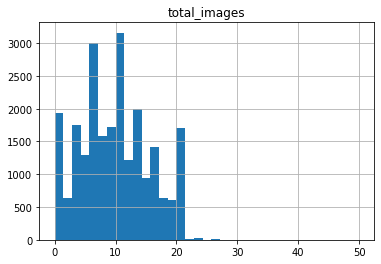

In [ ]:
data.hist('total_images', bins=35)
data['total_images'].describe()

Диапазон количества размещаемых фотографий в объявлении от 0 до 50, в среднеем люди размещают 9 фотографий в объявлении

### Анализ данных столбца `last_price` (цена на момент снятия с публикации)

Преобразуем формат данных столбца `last_price` в `int`, так как в цене не отображаются копейки

In [ ]:
data['last_price'] = data['last_price'].astype(int)

Просмотрим уникальные значения столбца `last_price`, цена квартиры на момент снятия с публикации

In [ ]:
data.value_counts('last_price')

last_price
4500000      342
3500000      291
4300000      260
4000000      260
4200000      259
            ... 
5898000        1
5894000        1
5886750        1
5885900        1
763000000      1
Length: 2978, dtype: int64

Удалим объявление с аномально низкой стоимостью квартиры 12190 (возможно пользователь перепутал и сдаёт квартиру, а не продает)

In [ ]:
data = data[data['last_price']!=12190]

Построим график и отобразим общую информацию по столбцу `last_price`

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

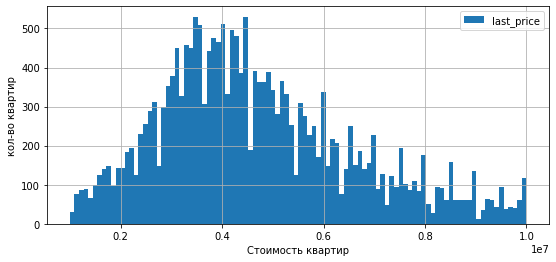

In [ ]:
t=  data.query('last_price>last_price.quantile(q=0.01) and last_price<last_price.quantile(q=0.95)')
t.plot(y='last_price', kind='hist',bins=100, grid=True, figsize=(9,4), range=(1000000,10000000)).set(xlabel='Стоимость квартир', ylabel='кол-во квартир')
data['last_price'].describe()

Минимальная стоимость квартиры 430000, максимальная стоимость 763000000. На графике видно что в среднем люди продают квартиры от 3.4 млн до 6.8, самая часто встречающаяся стоимость квартиры 4.6 млн. Так же около 170 квартир находятся в диапазоне от 10 млн до 763 млн.

### Анализ данных столбца `total_area` (общая площадь квартиры)

Изучим общую информацию по столбцу `total_area`, общая площадь квартиры

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

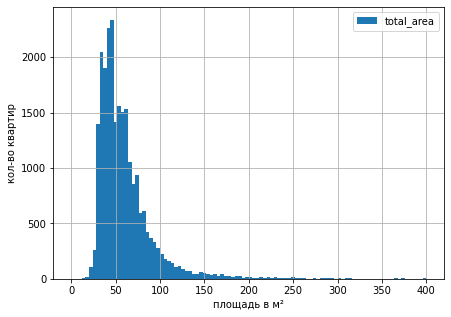

In [ ]:
data.plot(y='total_area', kind='hist',bins=100, grid=True, figsize=(7,5), range=(0,400)).set(xlabel='площадь в м²', ylabel='кол-во квартир')
data['total_area'].describe()

Площадь квартир находится в диапазоне от 12 кв.м. до 900 кв.м. Пик графика находится между 35-50 кв.м. Так же около 1500 объявление приходятся на квартиры с 50-60 кв. м.

### Анализ данных столбца `first_day_exposition` (дата последней публикации объявления)

Преобразуем столбец `first_day_exposition`(дата последней публикации объявления) в формат даты и отбросим время публикации, так как оно не заполнялось

In [ ]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%d")
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Построим график по 10 самым популярным дня размещения объявлений

,total_images
count,1491.000000
mean,15.894031
std,18.314722
min,1.000000
25%,4.000000
50%,10.000000
75%,25.000000
max,368.000000


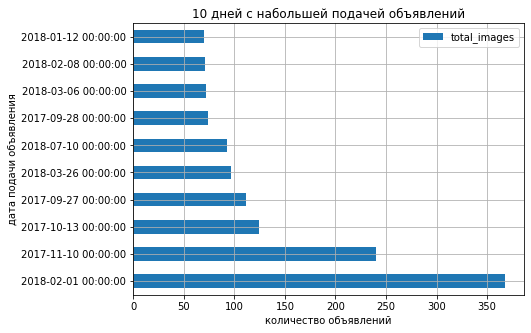

In [ ]:
data.groupby('first_day_exposition').count().reset_index().sort_values('total_images', ascending=False).head(10).plot(y='total_images', x ='first_day_exposition', kind='barh', grid=True, figsize=(7,5), title='10 дней с набольшей подачей объявлений').set(xlabel='количество объявлений', ylabel='дата подачи объявления')
data.groupby('first_day_exposition')['total_images'].count().reset_index().describe()

Просмотрев данные столбца можно сказать, что сервисом пользуются ежедневно, так как минимальное значаение объявлений в день равно 1, самое большое количество объявлений в день 368, в среднем в день выкладывается 15 объявлений.

### Анализ данных столбца `floors_total` (всего этажей в доме)

Построим график этажности домов в обявлениях по продаже недвижимости

count    23612.000000
mean        10.673217
std          6.596654
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

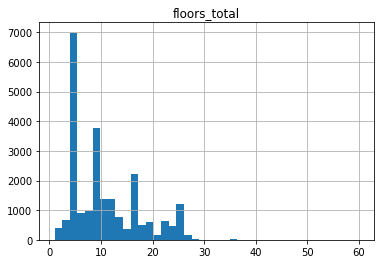

In [ ]:
data.hist('floors_total', bins=40)
data['floors_total'].describe()

В объявлениях имеется диапазон высоты зданий от 1 до 60 этажей. Большего всего продается квартир в 5 этажках. Потом идут девяти этажные здания.

### Анализ данных столбца `is_apartment` (является ли недвижимость аппартаметами)

Посмотрим уникальные значения столбца `is_apartment`(этот столбец типа булево, если недвижимость это аппартаменты, то будет True, иначе False)

In [ ]:
print(data['is_apartment'].unique())
print('Количество значений NaN столбца is_apartment',data['is_apartment'].isna().sum())

[nan False True]
Количество значений NaN столбца is_apartment 20923


Преобразуем незаполненные строки столбца `is_apartment` в False, если их не заполнили соответственно это не аппартаменты.
Преобразуем в тип булеан данные столбца.
И построим диаграмму по проценту аппартаментов в объявлениях.

[Text(0, 0.5, '')]

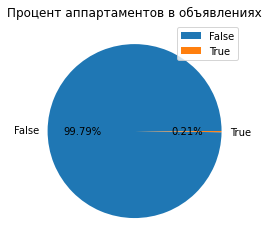

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
data.groupby(['is_apartment']).count().plot(kind='pie', y='rooms',autopct='%.2f%%', title='Процент аппартаментов в объявлениях').set(ylabel='')

Из диаграммы видно, что  процент аппартаментов в объявлениях равен 0.2% от 23698

### Анализ данных столбца `studio` (является ли недвижимость студией)

Построим диаграмму по проценту студий в объявлениях

[Text(0, 0.5, '')]

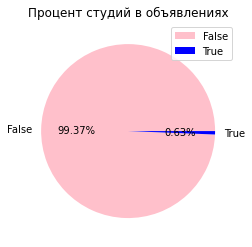

In [ ]:
data.groupby(['studio']).count().plot(kind='pie', y='rooms',autopct='%.2f%%',colors = ['pink', 'blue'], title='Процент студий в объявлениях').set(ylabel='')

Из диаграммы видно, что процент студий в объявлениях очень мал и равен 0.63% от 23698

### Анализ данных столбца `balcony` (количество балконов)

Посмотрим количество уникальных значений в столбце `balcony`(количество балконов), значения NaN перезапишем 0, и преобразуем в тип `int`, так как невозможно иметь половину балкона.

In [ ]:
print(data['balcony'].unique())
data['balcony']  = data['balcony'].fillna('0')
data['balcony'] = data['balcony'].astype(int)
data['balcony'].unique()

[nan  2.  0.  1.  5.  4.  3.]


array([0, 2, 1, 5, 4, 3])

Построим график по столбцу `balcony`

count    23698.000000
mean         0.591105
std          0.959311
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

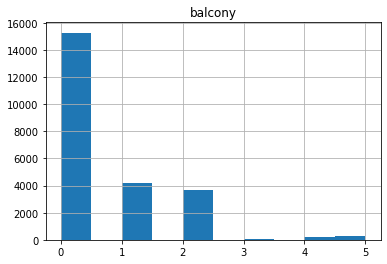

In [ ]:
data.hist('balcony')
data['balcony'].describe()

Из графика видно, что более чем в половине объявлений отсутсвует балкон в помещении. В большинстве остальных обявлениях указан 1-2 балкона.

### Анализ данных столбца `open_plan` (свободная планировка)

Построим диаграмму столбца `open_plan`(свободная планировка, содержит булевые значения True и False)

[Text(0, 0.5, '')]

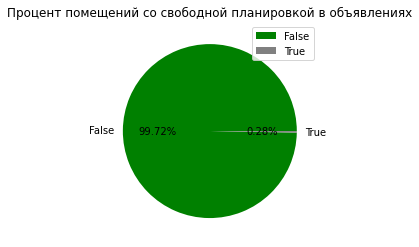

In [ ]:
data.groupby(['open_plan']).count().plot(kind='pie', y='rooms',autopct='%.2f%%',colors = ['green', 'grey'], title='Процент помещений со свободной планировкой в объявлениях').set(ylabel='')

На диаграмме видно, что процент квартир со свободной планировкой, мал и равен 0.28% от всего количества объявлений.

### Анализ данных столбца `locality_name` (названия населённых пунктов)

Проверим столбец `locality_name`(названия населённых пунктов) на наличиие неявных дубликатов

In [ ]:
print('Количество оригинальных названий населённых пунктов', len(data.groupby('locality_name')))
data['locality_name'].unique()

Количество оригинальных названий населённых пунктов 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Убираем неявные дубликаты и проверяем изменения

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок городского типа')
data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино','Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово','Кудрово')
data['locality_name'] = data['locality_name'].str.replace('посёлок Любань','Любань')
data['locality_name'] = data['locality_name'].str.replace('село Никольское','Никольское')
print('Количество оригинальных названий населённых пунктов', len(data.groupby('locality_name')))
data['locality_name'].unique()

Количество оригинальных названий населённых пунктов 319


array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'посёлок городского типа Красный Бор',
       'Гатчина', 'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы

Построим график по 10 самым популярным населённым пунктам по подаче объявлений

[Text(0, 0.5, '')]

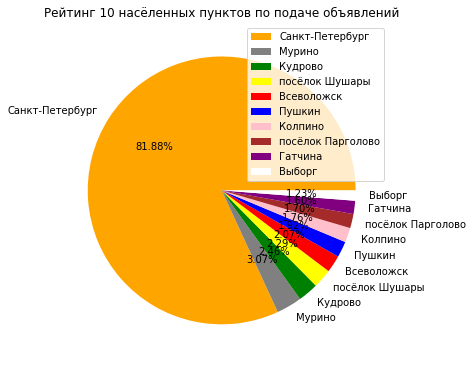

In [ ]:
data.groupby('locality_name').count().sort_values('total_images',ascending=False).head(10).plot(kind='pie', y='total_images',autopct='%.2f%%',colors = ['orange', 'grey','green','yellow','red','blue','pink','brown','purple','white'], title='Рейтинг 10 насёленных пунктов по подаче объявлений',figsize=(6,9)).set(ylabel='')

Из графика видно, что лидером по размещению объявлений о продаже квартир является Санкт-Петербург, на него приходится более 81% обявлений, далее идут Мурино на него приходится более 3% объявлений

### Анализ данных столбца `ceiling_height` (высота потолков)

Посмотрим на уникальные значения столбца `ceiling_height`(высота потолков)

In [ ]:
print(data['ceiling_height'].describe())
data['ceiling_height'].unique()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В рельтатах имеется как аномально низкая (меньше 2.40 м) , так и большая высота потолков (от 20 метров).
Уберем объявлений с высотой меньше 2.40 м, высоту более 20 метров, разделим на 10, скорее всего пользователи, некорректно заполнили инофрмацию.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x if x < 20 else x/10)
data = data[(data['ceiling_height']>2.39)]

In [ ]:
data['ceiling_height'].unique()

array([ 2.7 ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,
        2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  2.45,
        3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,  3.62,
        3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,  3.38,
        3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  3.57,  2.48,  2.62,
        2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,  3.67,
        3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,
        3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,
        2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,  3.27,  4.1 ,
        2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  8.3 ,  2.98,  2.86,
        3.17,  4.4 ,

Построим график по высоте потолков в объявлениях

count    14480.000000
mean         2.730751
std          0.318566
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

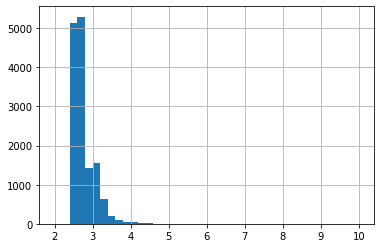

In [ ]:
data['ceiling_height'].hist(range=(2,10), bins=40)
data['ceiling_height'].describe()

Минимальная высота потолков составляет 2.4 м, максимальная 14м, возможно это двухэтажная квартира.
В среднем высота потолков составляет 2.7 м.

### Анализ данных столбца `days_exposition` (сколько дней было размещенно объявление)

Построим график по тому сколько дней было размещенно объявление

count    12031.000000
mean       190.559222
std        228.821999
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

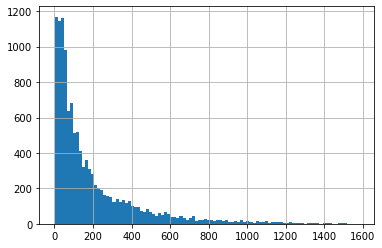

In [ ]:
data['days_exposition'].hist( bins=100)
data['days_exposition'].describe()

Из графика видно, что в основном люди размещают объявления от 45 до 100 дней, минимальное количество дней размещения объявления 1, максимально 1580 дней.

### Анализ данных столбца `rooms` (число комнат)

Просмотрим уникальные значения столбца `rooms`

In [ ]:
print(data['rooms'].unique())
data.value_counts('rooms')

[ 3  2  1  4  6  5  7 11  0 14 10  8 15  9 16 12]


rooms
2     4841
1     4605
3     3782
4      800
5      231
0       82
6       74
7       43
9        7
8        6
10       3
11       2
12       1
14       1
15       1
16       1
dtype: int64

Проверим принадлежат ли нулевые значения комнат к типу квартир студия или свободная планировка

In [ ]:
data.query('rooms==0 and (studio==True or open_plan==True)').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,5,1500000,17.0,2017-06-07,0,2.70,9.0,12.0,1,False,...,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
12996,8,1900000,18.0,2019-01-25,0,2.60,5.0,16.0,3,False,...,NaN,0,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0
8755,1,1350000,18.8,2017-11-22,0,2.75,19.0,15.8,1,False,...,NaN,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
8454,7,2250000,19.0,2019-03-12,0,3.00,6.0,NaN,2,False,...,NaN,0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0
9817,8,2190000,19.0,2018-10-12,0,3.50,5.0,15.0,1,False,...,NaN,0,Санкт-Петербург,29561.0,8264.0,2.0,383.0,1.0,781.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,20,5050000,44.2,2017-09-14,0,2.70,9.0,32.2,1,False,...,NaN,0,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
13613,16,8100000,58.4,2019-04-26,0,3.30,7.0,33.0,6,False,...,NaN,0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
21227,0,8200000,71.0,2017-07-21,0,5.80,5.0,68.0,5,False,...,NaN,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20082,10,16300000,98.4,2017-11-08,0,3.10,5.0,60.5,2,False,...,NaN,0,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0


Проверим есть ли исключения квартиры более 100м и не студии

In [ ]:
data.query('total_area>100 and rooms==0 and studio!=True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000,371.0,2018-07-26,0,3.57,7.0,NaN,6,False,...,NaN,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


Заполним пропуски квартиры свободной планировки и более 350 метров заполним медианым значением квартир такого же типа и метража, остальным студиям и квартирам свободной планировки, заполним значением 1 комната.

In [ ]:
data.loc[(data['total_area']>350)&(data['open_plan']==True),'rooms'] = data.loc[(data['total_area']>350)&(data['total_area']<400),'rooms'].median()
data.loc[((data['studio']==True) |  (data['open_plan']==True)) & (data['rooms']==0),'rooms'] = 1

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Построим график квартиры с каким количеством комнат чаще попадают в объявления

count    14480.000000
mean         2.143715
std          1.091628
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

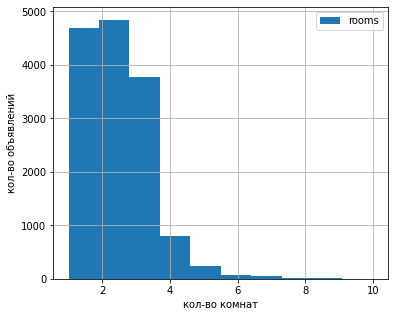

In [ ]:
data.plot(y='rooms', kind='hist', grid=True,bins=10,range=(1,10), figsize=(6,5)).set(xlabel='кол-во комнат', ylabel='кол-во объявлений')
data['rooms'].describe()

Однокомнатные квартиры выставляются чаще других, затем идут двухкомнатные (7931 объявлений), трехкомнатные(5807 объявлений).

### Анализ данных столбца `floor` (этаж недвижимости)

Просмотрим уникальные значения столбца

In [ ]:
print(data['floor'].unique())
data.value_counts('floor')

[ 8 13  7  3  5  1  2 11 15  9 18  4 22 19 20  6 16 10 25 17 14 12 21 24
 23 30 26 27 29]


floor
2     2131
3     1920
1     1815
4     1799
5     1660
6      791
7      768
8      657
9      633
10     395
11     300
12     288
13     218
15     185
16     175
14     172
17     116
18      86
19      79
21      66
20      60
22      51
23      49
24      26
25      23
26      11
27       4
29       1
30       1
dtype: int64

count    14480.000000
mean         5.624240
std          4.616762
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

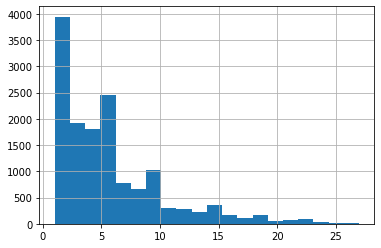

In [ ]:
data['floor'].hist(range=(1,27),bins=20)
data['floor'].describe()

Чаще всего продают недвижимость на втором этаже (3365 объявлений), потом на третьем (3071 объявлений), далее на первом (2911 объявлений)

### Анализ данных столбца `kitchen_area` (Площадь кухни)

In [ ]:
print(data['kitchen_area'].describe())
data['kitchen_area'].unique()
data.value_counts('kitchen_area')

count    13543.000000
mean        10.569948
std          6.050517
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


kitchen_area
6.00      796
10.00     728
8.00      682
7.00      663
9.00      634
         ... 
11.85       1
11.84       1
11.81       1
11.69       1
112.00      1
Length: 723, dtype: int64

Построим график столбца `kitchen_area`

count    13543.000000
mean        10.569948
std          6.050517
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

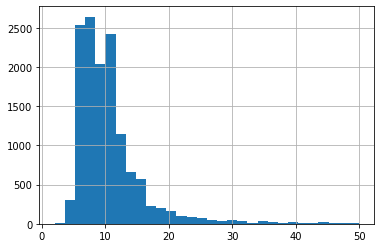

In [ ]:
data['kitchen_area'].hist(bins=30, range=(2,50))
data['kitchen_area'].describe()

Большего всего объявлений с размером кухни 6 кв.м., основной диапозон размеров кухни находится от 6 до 11 кв. м.

### Анализ данных столбца `living_area` (жилая площадь)

Просмотрим уникальные значения стобца

In [ ]:
print(data.value_counts('living_area').head(20))
data['living_area'].unique()

living_area
18.0    489
17.0    372
30.0    364
20.0    300
16.0    262
28.0    235
31.0    224
27.0    196
32.0    196
19.0    188
29.0    183
15.0    167
40.0    137
42.0    136
33.0    128
43.0    127
39.0    120
35.0    118
34.0    113
17.5     99
dtype: int64


array([51.  , 32.  , 43.6 , ..., 13.59,  3.  , 12.6 ])

Построим график столбца `living_area`

count    13686.000000
mean        35.686294
std         22.863316
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

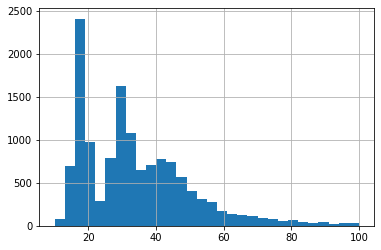

In [ ]:
data['living_area'].hist(bins=30,range=(10,100) )
data['living_area'].describe()

Больше всего объявлений содержат жилую площадь в диапазоне от 16-30 кв.м. Медианное значение жилой площади в объявлениях 30 кв.м.

### Анализ данных столбца `airports_nearest` (расстояние до ближайщего аэропорта)

Посмотрим значения столбца

In [ ]:
data['airports_nearest'].describe()

count    11531.000000
mean     28817.750846
std      12627.276640
min          0.000000
25%      18551.000000
50%      26737.000000
75%      37083.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Удалим аномальное значения 0, так как недвижимость не может находится в аэропорту

In [ ]:
data = data[~(data['airports_nearest']==0)]


<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал, молодец!

count    11530.000000
mean     28820.250217
std      12624.971555
min       6914.000000
25%      18551.250000
50%      26743.500000
75%      37083.000000
max      84869.000000
Name: airports_nearest, dtype: float64

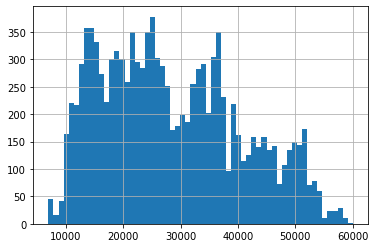

In [ ]:
data['airports_nearest'].hist(range=(7000,60000), bins=60)
data['airports_nearest'].describe()

На графике видно, что в основном недвижимость находится на расстояния от аэропорта 1800-3800 метров.

### Анализ данных столбца `cityCenters_nearest` (расстояние до центра города)

Просмотрим значения столбца

In [ ]:
data['cityCenters_nearest'].describe()

count    11550.000000
mean     14064.206234
std       8760.389424
min        181.000000
25%       9037.250000
50%      12949.000000
75%      16032.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Построим график

<AxesSubplot:>

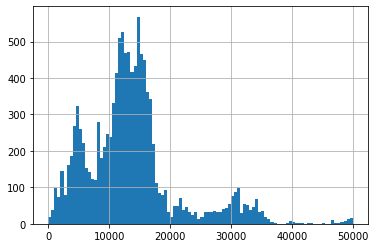

In [ ]:
data['cityCenters_nearest'].hist(range=(0,50000), bins=100)

В основном недвижимость расположена на удалении в 9000 - 17000м от центра.

### Анализ данных столбца `parks_nearest` (расстояние до ближайшего парка)

Просмотрим значения столбца

In [ ]:
data['parks_nearest'].describe()

count    5288.000000
mean      476.612330
std       319.995802
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим график

<AxesSubplot:>

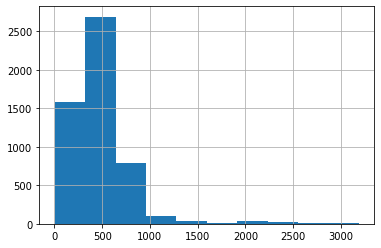

In [ ]:
data['parks_nearest'].hist()

В основном недвижимость находится на удалении в 300-800 метров от парков.

### Анализ данных столбца `parks_around3000` (число парков в радиусе 3 км)

Просмотрим значения столбца

In [ ]:
data.value_counts('parks_around3000')

parks_around3000
0.0    6265
1.0    3663
2.0    1155
3.0     468
dtype: int64

Построим график

count    11551.000000
mean         0.638646
std          0.820923
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

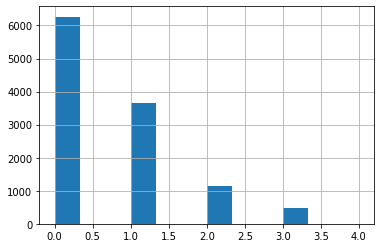

In [ ]:
data['parks_around3000'].hist(range=(0,4), bins=12)
data['parks_around3000'].describe()

В основном квартиры из объявлений находятся на удалении более 3 км от ближайшего парка (10102 объявления), один парк в радиусе 3км от недвижимости есть у 5676 объявлений.

### Анализ данных столбца `ponds_nearest` (расстояние до ближайшего водоёма)

In [ ]:
data['ponds_nearest'].describe()

count    5727.000000
mean      518.486293
std       280.092142
min        16.000000
25%       287.000000
50%       504.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:>

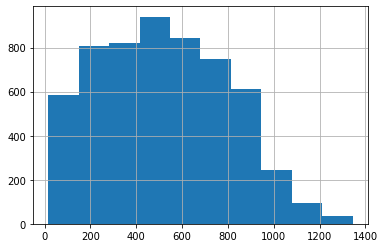

In [ ]:
data['ponds_nearest'].hist()

В основном недвижимость находится на удалении в 200-800 метров от водоёмов.

### Анализ данных столбца `ponds_around3000` (число водоёмов в радиусе 3 км)

In [ ]:
data.value_counts('ponds_around3000')

ponds_around3000
0.0    5824
1.0    3494
2.0    1239
3.0     994
dtype: int64

count    11551.000000
mean         0.775171
std          0.951423
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

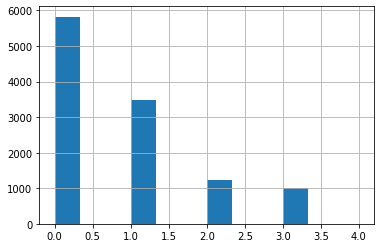

In [ ]:
data['ponds_around3000'].hist(range=(0,4), bins=12)
data['ponds_around3000'].describe()

В основном квартиры из объявлений находятся на удалении более 3 км от ближайшего водоёма (9066 объявления), один водоём в радиусе 3км от недвижимости есть у 5714 объявлений.

### Посчитано и добавлено в таблицу: цена одного квадратного метра

Посчитаем цену квадратного метра столбец `price_meter`

In [ ]:
data['price_meter'] =  data['last_price'] / data['total_area']

/tmp/ipykernel_48/995673686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_meter'] =  data['last_price'] / data['total_area']


Построим график

count    1.447900e+04
mean     1.016757e+05
std      5.062349e+04
min      9.615385e+03
25%      7.847378e+04
50%      9.673913e+04
75%      1.165746e+05
max      1.736842e+06
Name: price_meter, dtype: float64

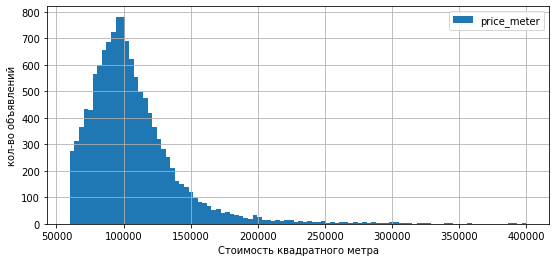

In [ ]:
data.plot(y='price_meter', kind='hist',bins=100, grid=True, figsize=(9,4), range=(60000,400000)).set(xlabel='Стоимость квадратного метра', ylabel='кол-во объявлений')
data['price_meter'].describe()

Пик графика приходиться на 110000 рублей/ кв.м. В среднем один квадратный метр стоит 100000 рублей.

### Посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

Напишем функцию заполняющие значением (день недели), взависимости от цифры на входе

In [ ]:
def day_of_publication(day):
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    else:
        return 'воскресенье'

Создадим столбец `day_of_publication` и заполним его названиями дней недели

In [ ]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday.apply(day_of_publication)


Построим график количества объявлений по дням недели

[Text(0.5, 0, 'количество объявлений'), Text(0, 0.5, 'день недели')]

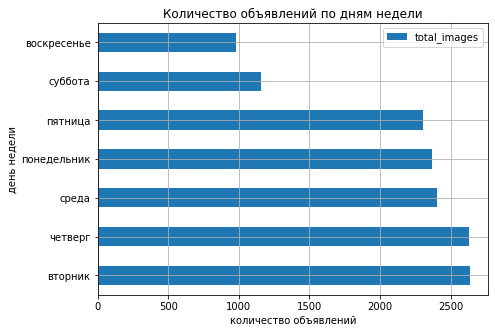

In [ ]:
data.groupby('day_of_publication').count().reset_index().sort_values('total_images', ascending=False).head(10).plot(y='total_images', x ='day_of_publication', kind='barh', grid=True, figsize=(7,5), title='Количество объявлений по дням недели').set(xlabel='количество объявлений', ylabel='день недели')

Из графика видно, что меньше всего люди выкладывают объявления в воскресения и субботу, и чаще всего выкладывают в четверг

### Посчитано и добавлено в таблицу: месяц публикации объявления

Создадим новый столбец `month_of_publication` и заполним его месяцем публикации

In [ ]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

Построим график

month_of_publication
3     1727
2     1688
4     1482
11    1422
10    1325
9     1213
8     1092
7     1068
12     936
1      923
6      910
5      693
dtype: int64

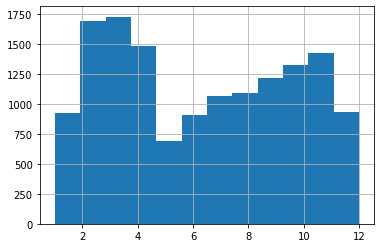

In [ ]:
data['month_of_publication'].hist(bins=12,range=(1,12))
data.value_counts('month_of_publication')

Самыми популярными месяцами по размещению объявлений являются февраль, март, апрель. Самый непопулярный май

### Посчитано и добавлено в таблицу: год публикации объявления

Создадим новый столбец `year_of_publication` и заполним его годом публикации

In [ ]:
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

Построим график

year_of_publication
2018    5780
2017    4443
2019    2197
2016    1373
2015     610
2014      76
dtype: int64

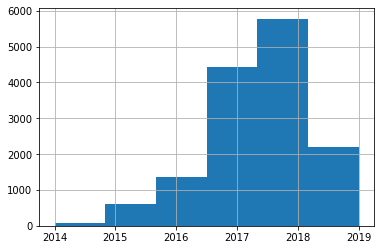

In [ ]:
data['year_of_publication'].hist(bins=6)
data.value_counts('year_of_publication')

На графике видно, что самыми популярными годами по размещению объявлений были 2018 и 2017(более 8000), дальше пошел сильный спад 2019 2876 объявлений

### Посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

Построим функцию type_floor, которая проверяет значения столбца и присваивает значение, взависимости от результата

In [ ]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

Создадим столбец `type_floor` и присвоим ему значения( «первый», «последний», «другой»)

In [ ]:
data['type_floor'] = data.apply(type_floor, axis=1)

Построим график

type_floor
другой       10578
последний     2086
первый        1815
dtype: int64

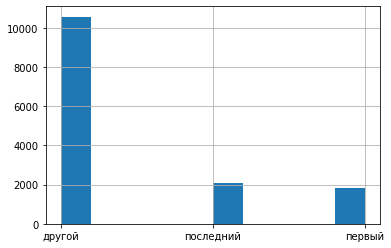

In [ ]:
data['type_floor'].hist()
data.value_counts('type_floor')

Больше всего объявлений с квартирами со второго по предпоследний этаж, объявлений с квартирами на первом этаже 2911, чуть больше на последнем этаже 3332

### Посчитано и добавлено в таблицу: расстояние в км до центра города

Создадим столбец cityCenters_nearest_km и заполним его расстояние до центра города в километрах

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

def ceil_number(number):
    return math.ceil(number)

data['cityCenters_nearest_km']   = data.loc[~(data['cityCenters_nearest_km'].isna()), 'cityCenters_nearest_km'].apply(ceil_number)

Построим график

count    11550.000000
mean        14.566061
std          8.762641
min          1.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

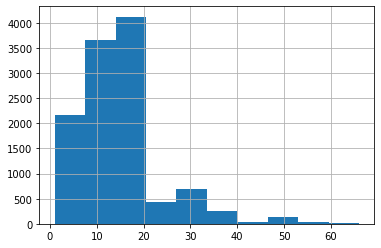

In [ ]:
data['cityCenters_nearest_km'].hist()
data['cityCenters_nearest_km'].describe()

В большей части объявлений недвижимость находиться на удалении 9-20 км от центра города

### **Вывод:**

При проведении предобработки были обнаруженны следующие проблемы:
 * Неявные дубликаты
 * Аномальные значения
 * Несоответствие типов данных
 * Наличие пропусков
  
  
 1) Неявные дубликаты были обнаруженны в столбце `locality_name`('поселок' и 'посёлок'; 'городской посёлок' и 'посёлок городского типа'; 'посёлок Мурино' и 'Мурино'; 'деревня Кудрово' и 'Кудрово' и т.д.) их появление вызвано тем, что пользователь заполняет данные в свободной форме. Необходимо создать выпадающие списки, чтобы пользователь мог выбирать необходимые типы населённых пунктов и их названия.

 2) Аномальные значения были в столбацх `last_price`, `ceiling_height`, `rooms`, `airports_nearest`.

 В столбце `last_price` была найдена аномально низкая стоимость жилья, возможно пользователь перепутал и хотел выставить жилье в аренду, данная строка была удаленна.

 В столбце `ceiling_height` были обнаружены аномально маленькие и большие высоты потолков. Строки с потолками менее 2.4 метров были удаленны, высота более 20 метров (высота до 20 метров была оставленна, так как возможны двухэтажные квартиры) была поделена 10, так как возможно пользователь ошибся при заполнении поля. В качестве рекомендации можно уставновить проверку на поле заполнения, не позволяющие заносить аномально низкие значения.

 В столбце `rooms`(количество комнат в квартире) имелись значения 0. Было выявленно, что значение 0 было у квартир типа студия (столбец `studio`==True) и свободная планировка (столбец `open_plan`==True). В качестве рекомендации можно выставлять автоматическое значение 1 в столбце `rooms` при выборе типа студия и сделать необходимым заполнение столбца `rooms` так как он является ключевым полем.

 В столбце `airports_nearest` имелось аномальное значение 0, обозначавшее, что недвижимость находится в аэропорту, а это невозможно. Строка была удаленна.

 3) Несоответствие типов данных были в столбцах `last_price`, `first_day_exposition`, `is_apartment`, `balcony`.

 В столбец `last_price`заносились числа с плавающей точкой, преобразовали в целочисленные, так как цены не указывают с копейками.

 В столбец `first_day_exposition` заносились строковые значения, преобразовали в `datetime`, так как производить операции со строковыми значениями неудобно.

 В столбец `is_apartment` заносились строковые значения, преобразовали в булевый тип данных, так производить манипуляции с данными неудобно.

 В столбец `balcony` заносились числа с плавающей точкой, преобразовали в целочисленные, так как невозможно иметь половину балкона.

 В качествее рекомендации необходимо преобразовать сбор данных в подходящие типы.

 4) Данные отсутствовали в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`,`locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000`, `days_expostiton`

 Пропуски в данных столбцах `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000`, `cityCenters_nearest`, `airports_nearest` не были заполненны, так как нехватает данных для их заполнения, подставление медианных и средних значений сильно исказит информацию и приведет к неверным выводам. В качестве рекомендации можно сделать столбцы `ceiling_height`, `floors_total`, `living_area` сделать обязательным к заполнению, так как они имеют ключевое значение при выборе недвижимости.

 Пропуски в столбцах `is_apartment` и `balcony`, были заполнены логическим путем, если пользователь их не заполнил соответсвенно они не относятся к его квартире. Если `is_apartment` не заполнен, значит это не аппартаменты, и если `balcony` не заполнены, значит их нет в квартире (0). В качествее рекомендации можно автоматически подставлять данные значения, если пользователь сам не выбрал необходимые ему.

 Пропуск в столбец `days_expostiton` не заполнен, так как возможно объявление ещё находится в статусе активное и квартира ещё продаётся.

 На основании имеющихся обработанных данным можно приступить к проверке гипотез и ответить на волнующие вопросы.


## Проверка гипотез

### Как быстро продаются квартиры

In [ ]:
print('В среднем продажа квартир занимает:',data['days_exposition'].mean(),'дней')
print('Медианное значение продажи квартир:',data['days_exposition'].median(),'дней')

В среднем продажа квартир занимает: 190.5700748129676 дней
Медианное значение продажи квартир: 103.0 дней


count    12030.000000
mean       190.570075
std        228.828413
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

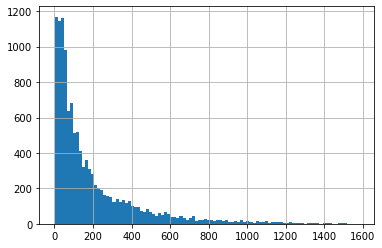

In [ ]:
data['days_exposition'].hist( bins=100)
data['days_exposition'].describe()

Из графика видно, что в основном продажа квартиры занимает от 45 до 100 дней. В среднем продажа квартиры занимает 180 дней, медианное время продажи 90 дней. Самые быстрые продажи проводятся в первые три дня, самые долгие от 400 дней.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Создадим переменную `price_meter_mean` и поместив в неё сводную таблицу в которой отобразим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Выведем таблицу.

In [ ]:
price_meter_mean = data.pivot_table(index='locality_name',values='price_meter',aggfunc=('count','mean')).reset_index().sort_values('count',ascending=False).head(10)
price_meter_mean

,locality_name,count,mean
33,Санкт-Петербург,10095,115736.487679
3,Всеволожск,271,67434.629936
32,Пушкин,234,103920.487928
22,Мурино,228,87816.925290
203,посёлок Шушары,217,79538.627641
13,Колпино,203,75938.525561
17,Кудрово,194,96105.431978
6,Гатчина,149,69992.693801
27,Петергоф,145,85554.144673
162,посёлок Парголово,137,90901.351145


Построим график

[Text(0.5, 0, 'Средняя цена 1 кв.м.'),
 Text(0, 0.5, 'Название населённого пункта')]

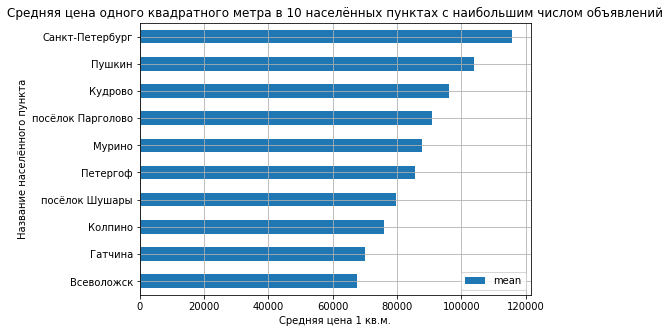

In [ ]:
price_meter_mean.sort_values('mean').plot(y='mean', x ='locality_name', kind='barh', grid=True, figsize=(7,5), title='Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений').set(xlabel='Средняя цена 1 кв.м.', ylabel='Название населённого пункта')

В Санкт-Петербурге самая высокая средняя цена одного квадратного метра 114857, в Выборге напротив самая маленькая из 10 насёленных пунктов с наибольшим числом объявлений и составляет 58238.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [ ]:
dd = data.pivot_table(index='last_price',values=('total_area','living_area','kitchen_area','rooms','type_floor','day_of_publication','month_of_publication','year_of_publication')).reset_index()
dd.corr()


,last_price,kitchen_area,living_area,month_of_publication,rooms,total_area,year_of_publication
last_price,1.000000,0.616584,0.681179,0.013441,0.505147,0.757547,-0.094455
kitchen_area,0.616584,1.000000,0.569854,0.004050,0.477423,0.685949,-0.120300
living_area,0.681179,0.569854,1.000000,0.055108,0.854878,0.952869,-0.092152
month_of_publication,0.013441,0.004050,0.055108,1.000000,0.042260,0.041387,-0.291256
rooms,0.505147,0.477423,0.854878,0.042260,1.000000,0.798552,-0.077151
total_area,0.757547,0.685949,0.952869,0.041387,0.798552,1.000000,-0.130634
year_of_publication,-0.094455,-0.120300,-0.092152,-0.291256,-0.077151,-0.130634,1.000000


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

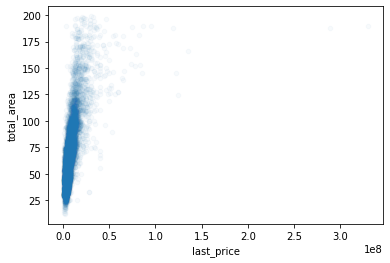

In [ ]:
data.query('total_area<200').plot(x='last_price', y='total_area', kind='scatter', alpha=0.03)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

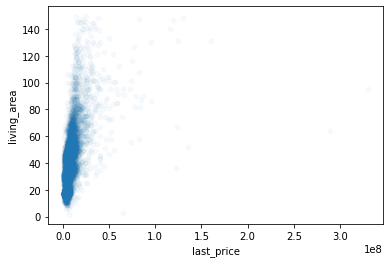

In [ ]:
data.query('living_area<150').plot(x='last_price', y='living_area', kind='scatter', alpha=0.03)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

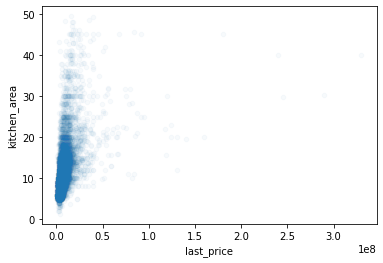

In [ ]:
data.query('kitchen_area<50').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.03)

<AxesSubplot:xlabel='rooms'>

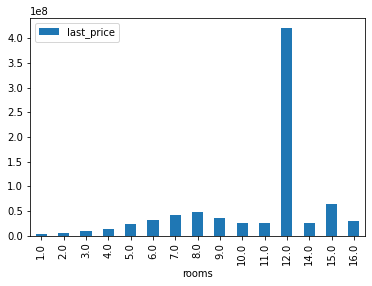

In [ ]:
data.pivot_table(index='rooms', values='last_price').reset_index().plot(x='rooms', y='last_price', kind='bar')

,last_price,type_floor
last_price,1.00000,0.06006
type_floor,0.06006,1.00000


<AxesSubplot:xlabel='type_floor'>

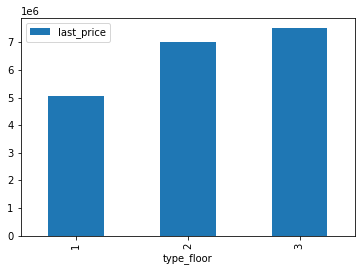

In [ ]:
t = data.replace({'type_floor' : { 'первый' : 1, 'другой' : 2, 'последний' : 3}})
display(t[['last_price', 'type_floor']].corr())
t= t.pivot_table(index='type_floor', values=('last_price')).reset_index()
t.plot(x='type_floor', y='last_price', kind='bar')

,last_price,day_of_publication
last_price,1.000000,-0.015695
day_of_publication,-0.015695,1.000000


<AxesSubplot:xlabel='last_price'>

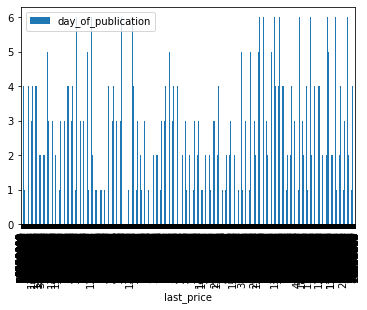

In [ ]:
t = data.replace({'day_of_publication' : { 'понедельник' : 0, 'вторник' : 1, 'среда' : 2, 'четверг' : 3, 'пятница' : 4, 'суббота' : 5, 'воскресенье' : 6}})
display(t[['last_price', 'day_of_publication']].corr())
t.plot(x='last_price', y='day_of_publication', kind='bar')


<AxesSubplot:xlabel='month_of_publication'>

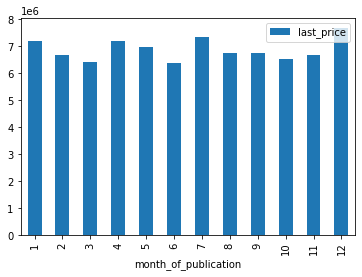

In [ ]:
data.pivot_table(index='month_of_publication', values=('last_price')).reset_index().plot(x='month_of_publication', y='last_price', kind='bar')

<AxesSubplot:xlabel='year_of_publication'>

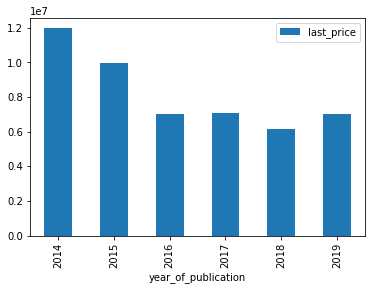

In [ ]:
data.pivot_table(index='year_of_publication', values=('last_price')).reset_index().plot(x='year_of_publication', y='last_price', kind='bar')

Самую большую корреляцию со стоимостью квартиры имеют столбцы общая площадь и жилая площадь.

### Как стоимость объектов зависит от расстояния до центра города?

Отфильтруем базу данных по городу Санкт-Петербург и удалим пустые значения в столбце расстояние до центра города.

In [ ]:
flats_spb = data.query('locality_name=="Санкт-Петербург"')
flats_spb = flats_spb.dropna(subset=['cityCenters_nearest'])

Расчитаем среднюю цену квадратного метра недвижимости и разделем на расстояние до центра города, так мы вычислим среднюю цену одного киллометра.
Построим график.

[Text(0.5, 0, 'Расстояние в км. до центра'), Text(0, 0.5, 'цена 1 кв.м')]

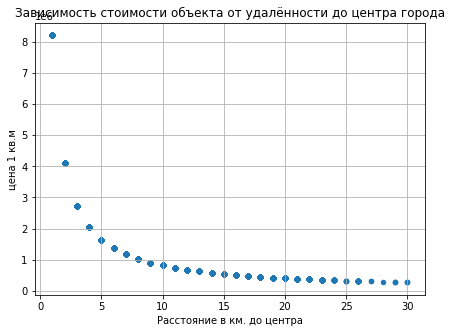

In [ ]:

flats_spb['avg_price_km'] = flats_spb['last_price'].mean() / flats_spb['cityCenters_nearest_km']
flats_spb.plot(x='cityCenters_nearest_km', y='avg_price_km', kind='scatter', grid=True, figsize=(7,5), title='Зависимость стоимости объекта от удалённости до центра города').set(xlabel='Расстояние в км. до центра', ylabel='цена 1 кв.м')

Из графика видно, что чем ближе недвижимость к центру города, тем она дороже. На это влияет много факторов:
 * престижность проживания в элитном районе;
 * надёжность инвестиций (квартиру в центре всегда легче продать или сдать в аренду);
 * транспортная доступность;
 * гарантированная развитость инфраструктуры (магазины, школы, детсады, поликлиники и т. д.);
 * чистота и комфорт (как правило, это наиболее ухоженная часть города);
 * более плотное сосредоточение социально-культурных объектов для отдыха и работы – культурных учреждений, административных, образовательных и бизнес-центров;
 * красивый вид из окна, особенно в исторической застройке, существенно увеличивающий ценность жилья;
 * возможность добраться пешком до большинства нужных мест в центре в час пик.

## Общий вывод

Входе проверки гипотез было пройдет три этапа:
1. Обзор данных
2. Предобработка данных.
3. Проверка гипотез

На стадии обзора данных был рассмотрен файл с датафреймом `real_estate_data.csv` содержащим информацию о объявлениях квартир, размещённых на Яндекс.Недвижимость. Было выявленно, что датафрейм содержит большое количество пропусков и несоответсвие типов данных в некоторых столбцах.

При проведении предобработки были устраненны следующие проблемы в датафрейме:
 * Неявные дубликаты
 * Аномальные значения
 * Несоответствие типов данных
 * Наличие пропусков
  
  
 1) Неявные дубликаты были обнаруженны в столбце `locality_name` их появление вызвано тем, что пользователь заполняет данные в свободной форме. Необходимо создать выпадающие списки, чтобы пользователь мог выбирать необходимые типы населённых пунктов и их названия.

 2) Аномальные значения были в столбацх `last_price`, `ceiling_height`, `rooms`, `airports_nearest`. Строки с аномальными значениями были удаленны, либо заполнялись из логики, если пользователь не заполнял какой-либо параметр, следовательно этот параметр отсутствует в его квартире, либо не применим к ней.
  
 В качестве рекомендации можно уставновить проверку на поле высота потолка при заполнении, что не позволит заносить аномально низкие значения. Так же можно выставлять автоматическое значение 1 в столбце `rooms` при выборе типа студия и сделать необходимым заполнение столбца `rooms` так как он является ключевым полем.
  
 3) Несоответствие типов данных были в столбцах `last_price`, `first_day_exposition`, `is_apartment`, `balcony`.

 У данных столбцов был преобразован тип данных, так как не соответствовал заполненным данным.
 В качествее рекомендации необходимо преобразовать сбор данных в подходящие типы.

 4) Данные отсутствовали в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`,`locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000`, `days_expostiton`

 Пропуски в данных столбцах `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000` не были заполненны, так как нехватает данных для их заполнения, подставление медианных и средних значений сильно исказит информацию и приведет к неверным выводам. В качестве рекомендации можно сделать столбцы `ceiling_height`, `floors_total`, `living_area` сделать обязательным к заполнению, так как они имеют ключевое значение при выборе недвижимости.

 Пропуски в столбцах `is_apartment` и `balcony`, были заполнены логическим путем, если пользователь их не заполнил соответсвенно они не относятся к его квартире. В качествее рекомендации можно автоматически подставлять данные значения, если пользователь сам не выбрал необходимые ему.

 Пропуск в столбец `days_expostiton` не заполнен, так как возможно объявление ещё находится в статусе активное и квартира ещё продаётся.

 Также были созданы новые столбцы , которые помогут при проверки гипотез `price_meter`(цена одного квадратного метра), `day_of_publication`(день публикации объявления (0 - понедельник, 1 - вторник и т.д.)), `month_of_publication`(месяц публикации объявления), `year_of_publication`(год публикации объявления), `type_floor`(тип этажа квартиры (значения — «первый», «последний», «другой»)), `cityCenters_nearest_km`(расстояние в км до центра города).

 После проведения предобработки данных, можно сказать, что в данных имеется большое количество пропусков. Пропуски не всегда получается заполнить исходя из имеющихся данных, что не позволяет полностью увидеть всю картину происходящего на рынке недвижимости. Так же необходимо доработать систему по сбору данных (выпадающие списки, обязательные поля, автоматическое заполнение).


На последнем этапе было отвечено на 4 вопроса:
 1) Как быстро продаются квартиры?

 В основном продажа квартиры занимает от 45 до 100 дней. В среднем продажа квартиры занимает 180 дней, медианное время продажи 90 дней. Самые быстрые продажи проводятся в первые три дня, самые долгие от 400 дней.

 2) Какая средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?

 В Санкт-Петербурге самая высокая средняя цена одного квадратного метра 114857, в Выборге напротив самая маленькая из 10 насёленных пунктов с наибольшим числом объявлений и составляет 58238.

 3) Какие факторы больше всего влияют на общую (полную) стоимость объекта?

    - общей площади;
    - жилой площади;
    - площади кухни;
    - количество комнат;
    - типа этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год);
    
 Из всех факторов самую большую корреляцию со стоимостью квартиры имеют столбцы общая площадь и жилая площадь.

 4) Как стоимость объектов зависит от расстояния до центра города?

 Чем ближе недвижимость к центру города, тем она дороже